In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
col_names=['buying','maint','doors','persons','lug_boot','safty','class']

In [6]:
df.columns=col_names

In [7]:
df.head()

,buying,maint,doors,persons,lug_boot,safty,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safty     1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.describe(include='all').T#taking transpose

,count,unique,top,freq
buying,1727,4,high,432
maint,1727,4,high,432
doors,1727,4,3,432
persons,1727,3,4,576
lug_boot,1727,3,med,576
safty,1727,3,med,576
class,1727,4,unacc,1209


In [11]:
for col in col_names:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safty
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [12]:
df[df.duplicated()]

,buying,maint,doors,persons,lug_boot,safty,class


In [13]:
import sklearn

In [14]:
from sklearn.preprocessing import OrdinalEncoder

ord=OrdinalEncoder()

In [26]:
df['buying']=ord.fit_transform(df[['buying']])
df['maint']=ord.fit_transform(df[['maint']])
df['persons']=ord.fit_transform(df[['persons']])
df['lug_boot']=ord.fit_transform(df[['lug_boot']])
df['safty']=ord.fit_transform(df[['safty']])
df['class']=ord.fit_transform(df[['class']])
df['doors']=ord.fit_transform(df[['doors']])

In [27]:
df.sample(5)

,buying,maint,doors,persons,lug_boot,safty,class
1161,2.0,2.0,3.0,0.0,2.0,2.0,2.0
598,0.0,0.0,2.0,0.0,1.0,0.0,2.0
430,3.0,1.0,3.0,2.0,0.0,0.0,0.0
970,2.0,3.0,3.0,2.0,0.0,0.0,0.0
962,2.0,3.0,3.0,2.0,2.0,1.0,2.0


In [28]:
df['doors'].unique()

array([0., 1., 2., 3.])

In [29]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [30]:
from sklearn.model_selection import  train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    X,y,
    random_state=0,
    test_size=0.3
)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
clf1=RandomForestClassifier()
clf1.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
y_pred=clf1.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,y_pred)

0.9595375722543352

In [39]:
!pip install yellowbrick


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   -------- ------------------------------- 61.4/282.6 kB 3.2 MB/s eta 0:00:01
   --------------------- ------------------ 153.6/282.6 kB 1.8 MB/s eta 0:00:01
   --------------------------------- ------ 235.5/282.6 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from yellowbrick.model_selection import  validation_curve

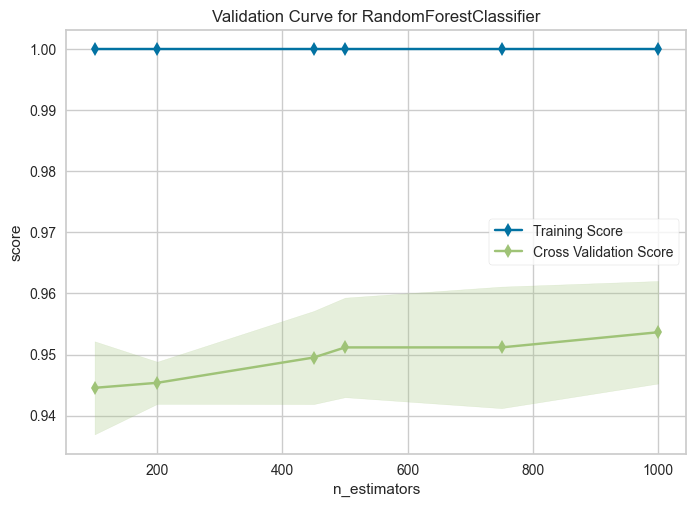

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([ 100,  200,  450,  500,  750, 1000]),
                scoring='accuracy')


In [43]:
num_est=[100,200,450,500,750,1000]

print(validation_curve(RandomForestClassifier(),X=X_train,y=y_train,param_name='n_estimators',
param_range=num_est,scoring='accuracy',cv=3))

In [44]:
clf2=RandomForestClassifier(n_estimators=1000,min_samples_split=3,max_depth=15,random_state=0)

In [45]:
clf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_split=3, n_estimators=1000,
                       random_state=0)

In [46]:
pred=clf2.predict(X_test)

In [47]:
accuracy_score(y_test,pred)

0.9653179190751445